In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score





In [3]:
airbnb = pd.read_csv("/Users/kdfer/ML Project1/Fintech Models/Airbnb_Data.csv")

airbnb

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [4]:
#removing irrelevant stuff
airbnb_v1 = airbnb.drop(['id', 'description','first_review', 'host_has_profile_pic','host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
                         'thumbnail_url', 'zipcode'], axis = 1)
airbnb_v1.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,t,NaN,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,100%,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,NaN,f,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,100%,t,4,40.0,0.0,1.0


In [5]:
airbnb_v1['host_response_rate']= airbnb_v1['host_response_rate'].str.rstrip('%').astype('float')/100
airbnb_v1['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74111 entries, 0 to 74110
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
55812 non-null  float64
dtypes: float64(1)
memory usage: 579.1 KB


In [6]:
from sklearn.impute import SimpleImputer


In [7]:
# for numeric stuff
SI = SimpleImputer(strategy = 'median')
SI.fit(airbnb_v1.select_dtypes(include = 'number'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'number'))
airbnb_num = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'number').columns)
airbnb_num.head()


,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0


In [8]:
airbnb_num.isnull().sum()

# no more empty

log_price               0
accommodates            0
bathrooms               0
host_response_rate      0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [9]:
# now fill in for the objects 
# create objects part
SI = SimpleImputer(strategy = 'most_frequent')
SI.fit(airbnb_v1.select_dtypes(include = 'object'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'object'))
airbnb_obj = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'object').columns)
airbnb_obj.head()


,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t


In [10]:
airbnb_obj.isnull().sum()
# no more empty

property_type             0
room_type                 0
amenities                 0
bed_type                  0
cancellation_policy       0
city                      0
host_identity_verified    0
instant_bookable          0
dtype: int64

In [11]:
# merge sheets by the cleaning fee

# merging 'airbnb_obj' with 'airbnb_v2' and adding 'cleaning_fee' column
airbnb_v2 = pd.concat([airbnb_num, airbnb_obj], axis = 1)
airbnb_v2['cleaning_fee'] = airbnb_v1['cleaning_fee']
airbnb_v2.isnull().sum()

# all columns are now filled

log_price                 0
accommodates              0
bathrooms                 0
host_response_rate        0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
amenities                 0
bed_type                  0
cancellation_policy       0
city                      0
host_identity_verified    0
instant_bookable          0
cleaning_fee              0
dtype: int64

In [12]:
airbnb_v2.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable,cleaning_fee
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f,True
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t,True
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t,True
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f,True
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t,True


In [13]:
# replace amenities with a simple count of the amenities

aminities_count = []
for i in airbnb_v2['amenities']:
  aminities_count.append(len(i))

airbnb_v2['amenities'] = aminities_count
airbnb_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   accommodates            74111 non-null  float64
 2   bathrooms               74111 non-null  float64
 3   host_response_rate      74111 non-null  float64
 4   number_of_reviews       74111 non-null  float64
 5   review_scores_rating    74111 non-null  float64
 6   bedrooms                74111 non-null  float64
 7   beds                    74111 non-null  float64
 8   property_type           74111 non-null  object 
 9   room_type               74111 non-null  object 
 10  amenities               74111 non-null  int64  
 11  bed_type                74111 non-null  object 
 12  cancellation_policy     74111 non-null  object 
 13  city                    74111 non-null  object 
 14  host_identity_verified  74111 non-null

In [14]:
# group property type with less than 50 into other

value_count = airbnb_v2['property_type'].value_counts()
other_values = value_count[value_count < 50].index
airbnb_v2['property_type'] = airbnb_v2['property_type'].replace(other_values, 'Other')

airbnb_v2['property_type'].value_counts()

# now none of the obscure house types will mess with the data

property_type
Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                715
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Camper/RV             94
Timeshare             77
Cabin                 72
In-law                71
Hostel                70
Boutique hotel        69
Boat                  65
Name: count, dtype: int64

In [15]:
# all the specific cancelation policies will be grouped as super strict
airbnb_v2['cancellation_policy'] = airbnb_v2['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')
airbnb_v2['cancellation_policy'].value_counts()

cancellation_policy
strict          32374
flexible        22545
moderate        19063
super_strict      129
Name: count, dtype: int64

In [16]:
# encoding objects to work with regression 
# bascically quantifying the objects to true or false

airbnb_v3 = airbnb_v2.copy()

# creating dummy variables without droping first column for selected features 
airbnb_v3 = pd.get_dummies(airbnb_v3, columns = ['property_type', 'room_type', 'cancellation_policy'], dtype = int)

# drop lowest value one
airbnb_v3.drop(['property_type_Boat', 'room_type_Shared room', 'cancellation_policy_super_strict'], axis = 1, inplace = True)

# encode for rest 
airbnb_v3 = pd.get_dummies(airbnb_v3, drop_first = True, dtype = int)
airbnb_v3.head()


,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenities,cleaning_fee,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_t,instant_bookable_t
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,152,True,...,0,0,1,0,0,0,1,0,1,0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,218,True,...,0,0,1,0,0,0,1,0,0,1
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,311,True,...,0,0,1,0,0,0,1,0,1,1
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,210,True,...,0,0,1,0,0,0,0,1,1,0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,174,True,...,0,0,1,0,1,0,0,0,1,1


In [17]:
airbnb_v3.info()
# everything is full 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   log_price                      74111 non-null  float64
 1   accommodates                   74111 non-null  float64
 2   bathrooms                      74111 non-null  float64
 3   host_response_rate             74111 non-null  float64
 4   number_of_reviews              74111 non-null  float64
 5   review_scores_rating           74111 non-null  float64
 6   bedrooms                       74111 non-null  float64
 7   beds                           74111 non-null  float64
 8   amenities                      74111 non-null  int64  
 9   cleaning_fee                   74111 non-null  bool   
 10  property_type_Apartment        74111 non-null  int32  
 11  property_type_Bed & Breakfast  74111 non-null  int32  
 12  property_type_Boutique hotel   74111 non-null 

In [18]:
airbnb_v3['cleaning_fee'] = airbnb_v3['cleaning_fee'].astype('int')
# true/false ---> 0/1
airbnb_v3

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenities,cleaning_fee,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_t,instant_bookable_t
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,152,1,...,0,0,1,0,0,0,1,0,1,0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,218,1,...,0,0,1,0,0,0,1,0,0,1
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,311,1,...,0,0,1,0,0,0,1,0,1,1
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,210,1,...,0,0,1,0,0,0,0,1,1,0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,174,1,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1.0,1.0,1.0,0.0,96.0,1.0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
74107,5.043425,4.0,2.0,1.0,16.0,93.0,2.0,4.0,224,1,...,0,0,1,0,0,1,0,0,0,0
74108,5.220356,5.0,1.0,1.0,43.0,94.0,2.0,2.0,402,1,...,0,0,1,0,0,0,1,0,1,1
74109,5.273000,2.0,1.0,1.0,0.0,96.0,0.0,2.0,189,1,...,0,0,1,0,0,0,1,0,0,1


In [19]:
# Linear regression model

X = airbnb_v3.drop('log_price', axis = 1)
Y = airbnb_v3['log_price']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state = 7)
display(X_train.head())
print('\n')
X_test.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenities,cleaning_fee,property_type_Apartment,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_t,instant_bookable_t
32646,4.0,2.0,1.0,21.0,84.0,2.0,3.0,282,1,1,...,0,0,1,0,0,1,0,0,0,1
48270,2.0,1.0,0.2,0.0,96.0,1.0,1.0,165,0,1,...,0,0,1,0,0,1,0,0,0,0
62132,4.0,2.5,1.0,157.0,93.0,1.0,2.0,579,1,0,...,0,0,1,1,0,0,0,0,1,0
23388,2.0,1.0,1.0,11.0,100.0,1.0,1.0,191,1,1,...,0,0,1,1,0,0,0,0,1,0
39881,4.0,1.0,1.0,0.0,96.0,1.0,2.0,337,1,1,...,0,0,1,0,0,1,0,0,1,1


,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenities,cleaning_fee,property_type_Apartment,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_t,instant_bookable_t
50851,6.0,2.5,1.0,7.0,93.0,3.0,4.0,384,1,0,...,0,0,1,0,0,1,0,0,1,0
10969,4.0,1.5,1.0,50.0,97.0,1.0,1.0,110,1,1,...,0,0,1,0,0,1,0,0,1,0
49303,1.0,1.0,1.0,6.0,100.0,1.0,1.0,119,0,0,...,0,0,1,0,0,0,0,1,0,0
6221,2.0,1.0,1.0,0.0,96.0,1.0,1.0,62,0,1,...,0,0,1,0,0,0,0,1,1,0
28710,4.0,1.0,1.0,49.0,87.0,1.0,2.0,350,1,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
# ols regression - ordinary least squares, type of linear regression model
# 

In [21]:
import statsmodels.api as sm
# defining the model
ols_mod = sm.OLS(y_train, X_train)
# fitting the model
ols_res = ols_mod.fit()
# displaying model summary
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.200e+05
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:34:37   Log-Likelihood:                         -35777.
No. Observations:               51877   AIC:                                  7.164e+04
Df Residuals:                   51834   BIC:                                  7.202e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
accommodates                      0.0856      0.002     43.780      0.000       0.082       0.089
bathrooms                         0.1556      0.005     32.907      0.000       0.146       0.165
host_response_rate               -0.0278      0.015     -1.887      0.059      -0.057       0.001
number_of_reviews                -0.0006   5.94e-05    -10.476      0.000      -0.001      -0.001
review_scores_rating              0.0100      0.000     33.400      0.000       0.009       0.011
bedrooms                          0.1401      0.004     34.427      0.000       0.132       0.148
beds                             -0.0435      0.003    -13.920      0.000      -0.050      -0.037
amenities                      5.374e-05   2.08e-05      2.583      0.010     1.3e-05    9.45e-05
cleaning_fee                     -0.0533      0.005    -10.006      0.000      -0.064      -0.043
property_type_Apartment           1.7872      0.049     36.447      0.000       1.691       1.883
property_type_Bed & Breakfast     1.9367      0.056     34.577      0.000       1.827       2.046
property_type_Boutique hotel      2.1988      0.085     25.769      0.000       2.032       2.366
property_type_Bungalow            1.7385      0.058     30.207      0.000       1.626       1.851
property_type_Cabin               1.6743      0.083     20.122      0.000       1.511       1.837
property_type_Camper/RV           1.6133      0.076     21.103      0.000       1.463       1.763
property_type_Condominium         1.9020      0.050     37.723      0.000       1.803       2.001
property_type_Dorm                1.3123      0.070     18.799      0.000       1.176       1.449
property_type_Guest suite         1.6840      0.070     23.915      0.000       1.546       1.822
property_type_Guesthouse          1.6900      0.056     30.250      0.000       1.580       1.800
property_type_Hostel              1.2083      0.083     14.578      0.000       1.046       1.371
property_type_House               1.7432      0.049     35.253      0.000       1.646       1.840
property_type_In-law              1.4877      0.081     18.310      0.000       1.328       1.647
property_type_Loft                1.9481      0.052     37.557      0.000       1.846       2.050
property_type_Other               1.9209      0.054     35.800      0.000       1.816       2.026
property_type_Timeshare           2.4231      0.084     28.781      0.000       2.258       2.588
property_type_Townhouse           1.7618      0.051     34.311      0.000       1.661       1.862
property_type_Villa               1.9090      0.066     29.087      0.000       1.780       2.038
room_type_Entire home/apt         1.0911    

In [22]:
# detect for multicollinearity with vif score 
# vif score above 5 is bad, indicates multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index = X_train.columns)
print(vif_series)


accommodates                      12.464336
bathrooms                          9.320256
host_response_rate                45.331711
number_of_reviews                  1.471603
review_scores_rating             179.751192
bedrooms                           8.605805
beds                               9.817174
amenities                          8.100823
cleaning_fee                       4.635858
property_type_Apartment          354.239484
property_type_Bed & Breakfast      4.313054
property_type_Boutique hotel       1.501394
property_type_Bungalow             3.757038
property_type_Cabin                1.546841
property_type_Camper/RV            1.707451
property_type_Condominium         20.118538
property_type_Dorm                 1.968084
property_type_Guest suite          1.959873
property_type_Guesthouse           4.572722
property_type_Hostel               1.564441
property_type_House              122.339132
property_type_In-law               1.588350
property_type_Loft              

In [23]:
# now we drop the properties with high VIF score to see the impact that each column has

In [24]:
# dropping property type apartment to see the impact it has
X_train1 = X_train.drop('property_type_Apartment', axis = 1)
ols_mod1 = sm.OLS(y_train, X_train1)
ols_res1 = ols_mod1.fit()
print('R-squared: ', np.round(ols_res1.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res1.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [25]:
# dropping cancelation policy 
X_train2 = X_train.drop('cancellation_policy_strict', axis = 1)
ols_mod2 = sm.OLS(y_train, X_train2)
ols_res2 = ols_mod2.fit()
print('R-squared: ', np.round(ols_res2.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res2.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [26]:
# dropping review scores rating

X_train3 = X_train.drop('review_scores_rating', axis = 1)
ols_mod3 = sm.OLS(y_train, X_train3)
ols_res3 = ols_mod3.fit()
print('R-squared: ', np.round(ols_res3.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res3.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [27]:
# dropping bed type real bed

X_train4 = X_train.drop('bed_type_Real Bed', axis = 1)
ols_mod4 = sm.OLS(y_train, X_train4)
ols_res4 = ols_mod4.fit()
print('R-squared: ', np.round(ols_res4.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res4.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [28]:
# dropping cancellation policy column
X_train5 = X_train.drop('cancellation_policy_flexible', axis = 1)
ols_mod5 = sm.OLS(y_train, X_train5)
ols_res5 = ols_mod5.fit()
print('R-squared: ', np.round(ols_res5.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res5.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [29]:
# dropping property type house
X_train6 = X_train.drop('property_type_House', axis = 1)
ols_mod6 = sm.OLS(y_train, X_train6)
ols_res6 = ols_mod6.fit()
print('R-squared: ', np.round(ols_res6.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res6.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [30]:
# dropping cancellation policy moderate

X_train7 = X_train.drop('cancellation_policy_moderate', axis = 1)
ols_mod7 = sm.OLS(y_train, X_train7)
ols_res7 = ols_mod7.fit()
print('R-squared: ', np.round(ols_res7.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res7.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [31]:
# checking the vif scores for review scores rating

vif_series1 = pd.Series([variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])], index = X_train3.columns)
print(vif_series1)

accommodates                      12.445979
bathrooms                          9.315554
host_response_rate                45.037296
number_of_reviews                  1.470042
bedrooms                           8.595918
beds                               9.813000
amenities                          8.018165
cleaning_fee                       4.635469
property_type_Apartment          318.493264
property_type_Bed & Breakfast      3.980195
property_type_Boutique hotel       1.456147
property_type_Bungalow             3.473558
property_type_Cabin                1.490528
property_type_Camper/RV            1.633261
property_type_Condominium         18.128049
property_type_Dorm                 1.878604
property_type_Guest suite          1.862352
property_type_Guesthouse           4.197216
property_type_Hostel               1.511506
property_type_House              110.047343
property_type_In-law               1.529947
property_type_Loft                 8.949826
property_type_Other             

In [32]:
# drop columns with cancellation policy because they have high vif scores and don't really affect the prediction of the model

X_train8 = X_train3.drop(['cancellation_policy_flexible','cancellation_policy_moderate', 'cancellation_policy_strict'], axis = 1)
vif_series2 = pd.Series([variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])], index = X_train8.columns)
print(vif_series2)

accommodates                      12.418186
bathrooms                          9.307323
host_response_rate                44.368663
number_of_reviews                  1.434535
bedrooms                           8.593519
beds                               9.803198
amenities                          7.887039
cleaning_fee                       4.280668
property_type_Apartment          141.869094
property_type_Bed & Breakfast      2.330447
property_type_Boutique hotel       1.208361
property_type_Bungalow             2.116511
property_type_Cabin                1.223114
property_type_Camper/RV            1.282751
property_type_Condominium          8.595652
property_type_Dorm                 1.388914
property_type_Guest suite          1.388162
property_type_Guesthouse           2.447126
property_type_Hostel               1.236055
property_type_House               50.285718
property_type_In-law               1.240369
property_type_Loft                 4.553985
property_type_Other             

In [33]:
# now you do the process again
# columns real bed, apartment, house and host reponse rate are still high so we drop and check their effect

ols_mod8 = sm.OLS(y_train, X_train8)
ols_res8 = ols_mod8.fit()
print('R-squared: ', np.round(ols_res8.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res8.rsquared_adj,3))


R-squared:  0.99 
 Adj. R-squared:  0.99


In [34]:
# bed type real bed vif score was high so drop it here 

X_train9 = X_train8.drop('bed_type_Real Bed', axis = 1)
ols_mod9 = sm.OLS(y_train, X_train9)
ols_res9 = ols_mod9.fit()
print('R-squared: ', np.round(ols_res9.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res9.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [35]:
# property type apartment was also high so drop it here

X_train10 = X_train8.drop('property_type_Apartment', axis = 1)
ols_mod10 = sm.OLS(y_train, X_train10)
ols_res10 = ols_mod10.fit()
print('R-squared: ', np.round(ols_res10.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res10.rsquared_adj,3))

R-squared:  0.988 
 Adj. R-squared:  0.988


In [36]:
# r^2 does change 

# drop the host response rate

X_train12 = X_train8.drop('host_response_rate', axis = 1)
ols_mod12 = sm.OLS(y_train, X_train12)
ols_res12 = ols_mod12.fit()
print('R-squared: ', np.round(ols_res12.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res12.rsquared_adj,3))

R-squared:  0.99 
 Adj. R-squared:  0.99


In [37]:
# host response rate and bed type bed don't affect the model outcome so we can drop them 

# create new series 
vif_series3 = pd.Series([variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])], index = X_train12.columns)
print(vif_series3)

X_train13 = X_train12.drop('bed_type_Real Bed', axis = 1)
vif_series4 = pd.Series([variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])], index = X_train13.columns)
print(vif_series4)
# host response rate is already dropped in 12 



accommodates                      12.416968
bathrooms                          9.307276
number_of_reviews                  1.431872
bedrooms                           8.593511
beds                               9.801780
amenities                          7.870209
cleaning_fee                       4.277659
property_type_Apartment          122.719771
property_type_Bed & Breakfast      2.155142
property_type_Boutique hotel       1.180084
property_type_Bungalow             1.968923
property_type_Cabin                1.194076
property_type_Camper/RV            1.244945
property_type_Condominium          7.554614
property_type_Dorm                 1.333614
property_type_Guest suite          1.337323
property_type_Guesthouse           2.250749
property_type_Hostel               1.205105
property_type_House               43.725225
property_type_In-law               1.208551
property_type_Loft                 4.087114
property_type_Other                2.653387
property_type_Timeshare         

In [38]:
# further dropping if vif score is over 10 ish

ols_mod13 = sm.OLS(y_train, X_train13)
ols_res13 = ols_mod13.fit()
print('R-squared: ', np.round(ols_res13.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res13.rsquared_adj,3))


R-squared:  0.99 
 Adj. R-squared:  0.99


In [39]:
# dropping room type entire home 
X_train14 = X_train13.drop('room_type_Entire home/apt', axis = 1)
ols_mod14 = sm.OLS(y_train, X_train14)
ols_res14 = ols_mod14.fit()
print('R-squared: ', np.round(ols_res14.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res14.rsquared_adj,3))

R-squared:  0.988 
 Adj. R-squared:  0.988


In [40]:
X_train15 = X_train13.drop('room_type_Private room', axis = 1)
ols_mod15 = sm.OLS(y_train, X_train15)
ols_res15 = ols_mod15.fit()
print('R-squared: ', np.round(ols_res15.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res15.rsquared_adj,3))

R-squared:  0.989 
 Adj. R-squared:  0.989


In [41]:
X_train16 = X_train13.drop('accommodates', axis = 1)
ols_mod16 = sm.OLS(y_train, X_train16)
ols_res16 = ols_mod16.fit()
print('R-squared: ', np.round(ols_res16.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res16.rsquared_adj,3))

R-squared:  0.989 
 Adj. R-squared:  0.989


In [42]:
# drop accomodates
vif_series5 = pd.Series([variance_inflation_factor(X_train16.values, i) for i in range(X_train16.shape[1])], index = X_train16.columns)
print(vif_series5)

bathrooms                         9.241575
number_of_reviews                 1.429953
bedrooms                          7.840487
beds                              6.746354
amenities                         7.855455
cleaning_fee                      4.264420
property_type_Apartment          44.830221
property_type_Bed & Breakfast     1.410472
property_type_Boutique hotel      1.069025
property_type_Bungalow            1.370690
property_type_Cabin               1.074868
property_type_Camper/RV           1.088509
property_type_Condominium         3.412322
property_type_Dorm                1.105097
property_type_Guest suite         1.126056
property_type_Guesthouse          1.467576
property_type_Hostel              1.069877
property_type_House              17.104905
property_type_In-law              1.080010
property_type_Loft                2.137781
property_type_Other               1.600449
property_type_Timeshare           1.066605
property_type_Townhouse           2.672977
property_ty

In [43]:
# drop the room type ones with high vif

X_train17 = X_train16.drop(['room_type_Entire home/apt', 'room_type_Private room'], axis = 1)
vif_series6 = pd.Series([variance_inflation_factor(X_train17.values, i) for i in range(X_train17.shape[1])], index = X_train17.columns)
print(vif_series6)

bathrooms                         9.217895
number_of_reviews                 1.428691
bedrooms                          7.786827
beds                              6.233191
amenities                         7.841145
cleaning_fee                      4.138172
property_type_Apartment          22.717426
property_type_Bed & Breakfast     1.210205
property_type_Boutique hotel      1.034976
property_type_Bungalow            1.190387
property_type_Cabin               1.039653
property_type_Camper/RV           1.043925
property_type_Condominium         2.191559
property_type_Dorm                1.081006
property_type_Guest suite         1.063896
property_type_Guesthouse          1.248300
property_type_Hostel              1.061969
property_type_House               9.431132
property_type_In-law              1.043857
property_type_Loft                1.601911
property_type_Other               1.291778
property_type_Timeshare           1.031927
property_type_Townhouse           1.886324
property_ty

In [44]:
# now do it again with vif higher than 5 

X_train18 = X_train17.drop('city_NYC', axis = 1)
ols_mod18 = sm.OLS(y_train, X_train18)
ols_res18 = ols_mod18.fit()
print('R-squared: ', np.round(ols_res18.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res18.rsquared_adj,3))


R-squared:  0.985 
 Adj. R-squared:  0.985


In [45]:
X_train19 = X_train17.drop('bathrooms', axis = 1)
ols_mod19 = sm.OLS(y_train, X_train19)
ols_res19 = ols_mod19.fit()
print('R-squared: ', np.round(ols_res19.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res19.rsquared_adj,3))

R-squared:  0.984 
 Adj. R-squared:  0.984


In [46]:
X_train20 = X_train17.drop('bedrooms', axis = 1)
ols_mod20 = sm.OLS(y_train, X_train20)
ols_res20 = ols_mod20.fit()
print('R-squared: ', np.round(ols_res20.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res20.rsquared_adj,3))

R-squared:  0.984 
 Adj. R-squared:  0.984


In [47]:
X_train21 = X_train17.drop('city_LA', axis = 1)
ols_mod21 = sm.OLS(y_train, X_train21)
ols_res21 = ols_mod21.fit()
print('R-squared: ', np.round(ols_res21.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res21.rsquared_adj,3))

R-squared:  0.985 
 Adj. R-squared:  0.985


In [48]:
X_train22 = X_train17.drop('amenities', axis = 1)
ols_mod22 = sm.OLS(y_train, X_train22)
ols_res22 = ols_mod22.fit()
print('R-squared: ', np.round(ols_res22.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res22.rsquared_adj,3))

R-squared:  0.985 
 Adj. R-squared:  0.985


In [49]:
X_train23 = X_train17.drop('beds', axis = 1)
ols_mod23 = sm.OLS(y_train, X_train23)
ols_res23 = ols_mod23.fit()
print('R-squared: ', np.round(ols_res23.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res23.rsquared_adj,3))

R-squared:  0.984 
 Adj. R-squared:  0.984


In [50]:
# start dropping stuff to see how vif changes

vif_series7 = pd.Series([variance_inflation_factor(X_train22.values, i) for i in range(X_train22.shape[1])], index = X_train22.columns)
print(vif_series7)

bathrooms                         9.204518
number_of_reviews                 1.396571
bedrooms                          7.786805
beds                              6.202030
cleaning_fee                      4.009703
property_type_Apartment          20.273307
property_type_Bed & Breakfast     1.186554
property_type_Boutique hotel      1.029137
property_type_Bungalow            1.170440
property_type_Cabin               1.036993
property_type_Camper/RV           1.040619
property_type_Condominium         1.986915
property_type_Dorm                1.076421
property_type_Guest suite         1.052272
property_type_Guesthouse          1.211638
property_type_Hostel              1.057475
property_type_House               8.525916
property_type_In-law              1.036158
property_type_Loft                1.522680
property_type_Other               1.258658
property_type_Timeshare           1.027290
property_type_Townhouse           1.768923
property_type_Villa               1.094486
bed_type_Co

In [51]:
X_train24 = X_train22.drop('city_NYC', axis = 1)
vif_series8 = pd.Series([variance_inflation_factor(X_train24.values, i) for i in range(X_train24.shape[1])], index = X_train24.columns)
print(vif_series8)

bathrooms                        9.203724
number_of_reviews                1.394572
bedrooms                         7.784409
beds                             6.201638
cleaning_fee                     4.008879
property_type_Apartment          6.770808
property_type_Bed & Breakfast    1.065396
property_type_Boutique hotel     1.010481
property_type_Bungalow           1.069727
property_type_Cabin              1.016681
property_type_Camper/RV          1.015126
property_type_Condominium        1.431745
property_type_Dorm               1.041435
property_type_Guest suite        1.019824
property_type_Guesthouse         1.083632
property_type_Hostel             1.037035
property_type_House              4.180756
property_type_In-law             1.017697
property_type_Loft               1.170283
property_type_Other              1.087758
property_type_Timeshare          1.007818
property_type_Townhouse          1.315617
property_type_Villa              1.050913
bed_type_Couch                   1

In [52]:
X_train25 = X_train24.drop('bedrooms', axis = 1)
vif_series10 = pd.Series([variance_inflation_factor(X_train25.values, i) for i in range(X_train25.shape[1])], index = X_train25.columns)
print(vif_series10)

bathrooms                        8.138924
number_of_reviews                1.387356
beds                             4.108515
cleaning_fee                     4.006082
property_type_Apartment          6.745873
property_type_Bed & Breakfast    1.065384
property_type_Boutique hotel     1.010430
property_type_Bungalow           1.069727
property_type_Cabin              1.016604
property_type_Camper/RV          1.014861
property_type_Condominium        1.427688
property_type_Dorm               1.035863
property_type_Guest suite        1.019823
property_type_Guesthouse         1.082882
property_type_Hostel             1.027150
property_type_House              4.117374
property_type_In-law             1.017377
property_type_Loft               1.170262
property_type_Other              1.087731
property_type_Timeshare          1.007647
property_type_Townhouse          1.310550
property_type_Villa              1.050215
bed_type_Couch                   1.007041
bed_type_Futon                   1

In [53]:
X_train26 = X_train25.drop('bathrooms', axis = 1)
vif_series10 = pd.Series([variance_inflation_factor(X_train26.values, i) for i in range(X_train26.shape[1])], index = X_train26.columns)
print(vif_series10)

number_of_reviews                1.379879
beds                             3.061367
cleaning_fee                     4.005653
property_type_Apartment          4.983808
property_type_Bed & Breakfast    1.041699
property_type_Boutique hotel     1.007614
property_type_Bungalow           1.059941
property_type_Cabin              1.013387
property_type_Camper/RV          1.013761
property_type_Condominium        1.300530
property_type_Dorm               1.020139
property_type_Guest suite        1.015590
property_type_Guesthouse         1.069595
property_type_Hostel             1.019920
property_type_House              3.147885
property_type_In-law             1.015104
property_type_Loft               1.121692
property_type_Other              1.066166
property_type_Timeshare          1.005256
property_type_Townhouse          1.199694
property_type_Villa              1.028474
bed_type_Couch                   1.007003
bed_type_Futon                   1.014658
bed_type_Pull-out Sofa           1

In [54]:


# testing new model with dropped columns 


ols_mod26 = sm.OLS(y_train, X_train26)
ols_res26 = ols_mod26.fit()
ols_res26.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.015e+05
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:39:52   Log-Likelihood:                         -49289.
No. Observations:               51877   AIC:                                  9.864e+04
Df Residuals:                   51847   BIC:                                  9.890e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number_of_reviews                -0.0009   7.46e-05    -12.314      0.000      -0.001      -0.001
beds                              0.2674      0.002    118.213      0.000       0.263       0.272
cleaning_fee                      0.1011      0.006     15.749      0.000       0.088       0.114
property_type_Apartment           4.2905      0.008    568.592      0.000       4.276       4.305
property_type_Bed & Breakfast     4.0855      0.036    114.402      0.000       4.015       4.155
property_type_Boutique hotel      4.6052      0.091     50.782      0.000       4.427       4.783
property_type_Bungalow            4.3281      0.040    109.129      0.000       4.250       4.406
property_type_Cabin               4.2440      0.087     48.570      0.000       4.073       4.415
property_type_Camper/RV           4.0620      0.076     53.152      0.000       3.912       4.212
property_type_Condominium         4.4370      0.017    266.784      0.000       4.404       4.470
property_type_Dorm                2.8586      0.065     43.840      0.000       2.731       2.986
property_type_Guest suite         4.1452      0.066     63.032      0.000       4.016       4.274
property_type_Guesthouse          4.2168      0.035    120.293      0.000       4.148       4.286
property_type_Hostel              2.3699      0.087     27.294      0.000       2.200       2.540
property_type_House               4.1491      0.010    403.199      0.000       4.129       4.169
property_type_In-law              4.0732      0.084     48.335      0.000       3.908       4.238
property_type_Loft                4.4931      0.023    198.189      0.000       4.449       4.538
property_type_Other               4.4154      0.030    149.368      0.000       4.357       4.473
property_type_Timeshare           5.0926      0.089     57.381      0.000       4.919       5.267
property_type_Townhouse           4.2181      0.020    209.824      0.000       4.179       4.257
property_type_Villa               4.3898      0.057     76.386      0.000       4.277       4.502
bed_type_Couch                   -0.3947      0.046     -8.616      0.000      -0.484      -0.305
bed_type_Futon                   -0.3098      0.027    -11.346      0.000      -0.363      -0.256
bed_type_Pull-out Sofa           -0.2247      0.030     -7.388      0.000      -0.284      -0.165
city_Chicago                     -0.1874      0.013    -14.406      0.000      -0.213      -0.162
city_DC                           0.2488      0.011     22.837      0.000       0.227       0.270
city_LA                          -0.0291      0.007     -4.188      0.000      -0.043      -0.015
city_SF                           0.4388    

In [55]:
# drop stuff with high p value 

X_train27 = X_train26.drop('host_identity_verified_t', axis = 1)
ols_mod27 = sm.OLS(y_train, X_train27)
ols_res27 = ols_mod27.fit()
ols_res27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.050e+05
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:39:53   Log-Likelihood:                         -49289.
No. Observations:               51877   AIC:                                  9.864e+04
Df Residuals:                   51848   BIC:                                  9.889e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number_of_reviews                -0.0009   7.38e-05    -12.389      0.000      -0.001      -0.001
beds                              0.2674      0.002    118.243      0.000       0.263       0.272
cleaning_fee                      0.1015      0.006     15.976      0.000       0.089       0.114
property_type_Apartment           4.2919      0.007    623.807      0.000       4.278       4.305
property_type_Bed & Breakfast     4.0866      0.036    114.702      0.000       4.017       4.156
property_type_Boutique hotel      4.6054      0.091     50.785      0.000       4.428       4.783
property_type_Bungalow            4.3294      0.040    109.476      0.000       4.252       4.407
property_type_Cabin               4.2452      0.087     48.606      0.000       4.074       4.416
property_type_Camper/RV           4.0631      0.076     53.188      0.000       3.913       4.213
property_type_Condominium         4.4384      0.016    271.282      0.000       4.406       4.470
property_type_Dorm                2.8592      0.065     43.860      0.000       2.731       2.987
property_type_Guest suite         4.1464      0.066     63.108      0.000       4.018       4.275
property_type_Guesthouse          4.2180      0.035    120.650      0.000       4.149       4.287
property_type_Hostel              2.3713      0.087     27.328      0.000       2.201       2.541
property_type_House               4.1504      0.010    420.555      0.000       4.131       4.170
property_type_In-law              4.0744      0.084     48.374      0.000       3.909       4.240
property_type_Loft                4.4946      0.022    200.408      0.000       4.451       4.539
property_type_Other               4.4168      0.029    150.185      0.000       4.359       4.474
property_type_Timeshare           5.0936      0.089     57.413      0.000       4.920       5.268
property_type_Townhouse           4.2195      0.020    212.464      0.000       4.181       4.258
property_type_Villa               4.3912      0.057     76.514      0.000       4.279       4.504
bed_type_Couch                   -0.3949      0.046     -8.620      0.000      -0.485      -0.305
bed_type_Futon                   -0.3099      0.027    -11.346      0.000      -0.363      -0.256
bed_type_Pull-out Sofa           -0.2246      0.030     -7.383      0.000      -0.284      -0.165
city_Chicago                     -0.1870      0.013    -14.407      0.000      -0.212      -0.162
city_DC                           0.2490      0.011     22.876      0.000       0.228       0.270
city_LA                          -0.0289      0.007     -4.169      0.000      -0.042      -0.015
city_SF                           0.4390    

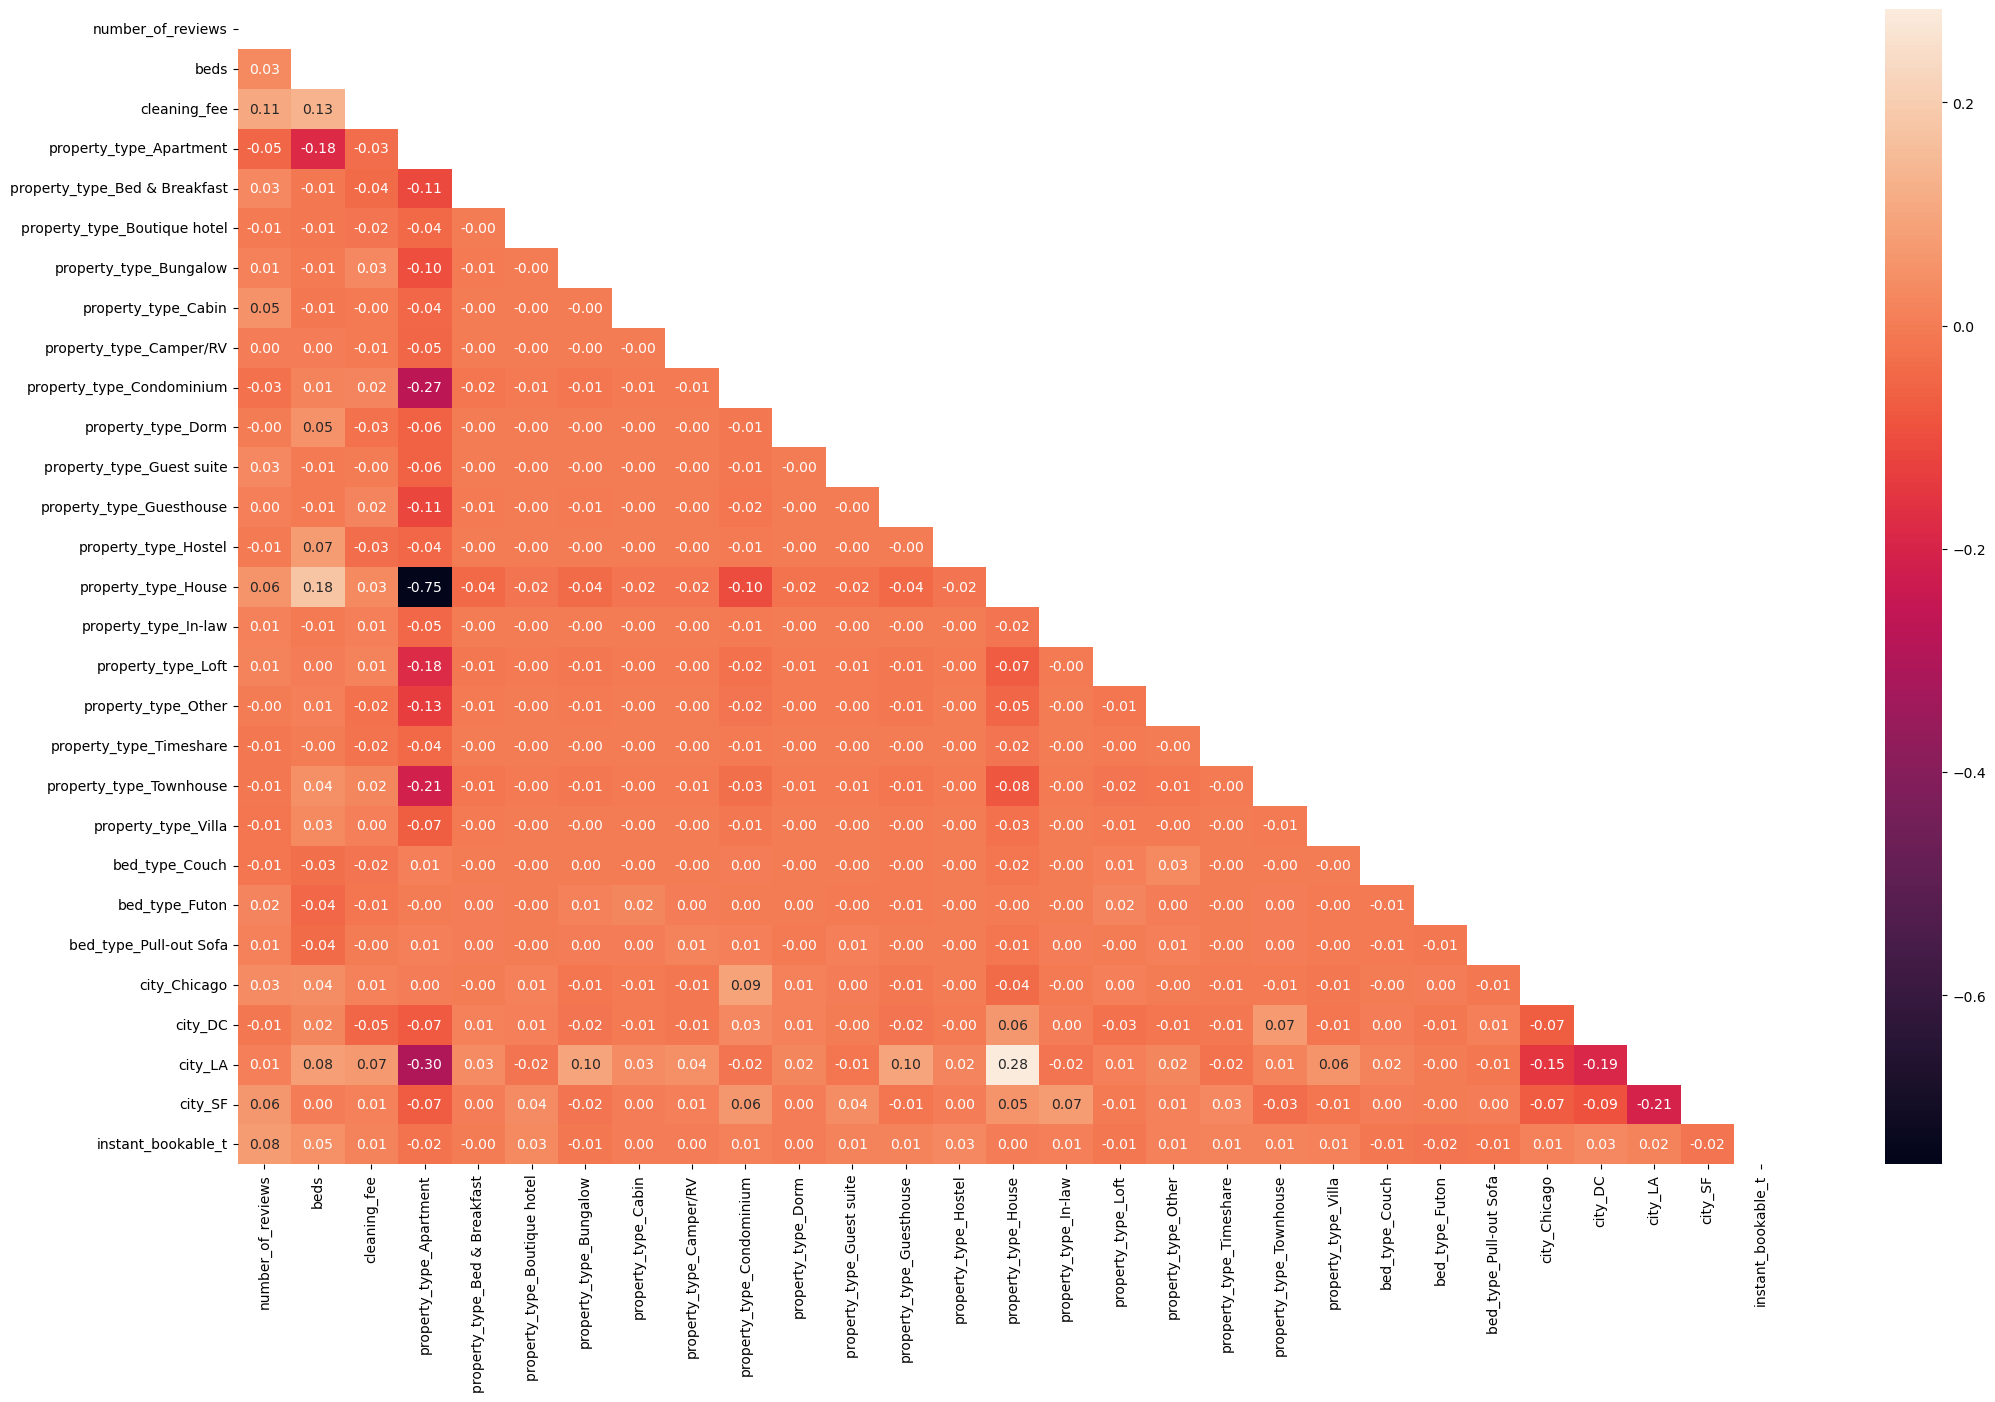

In [56]:
corr = X_train27.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(X_train27.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [57]:
# property type apartment seems to be the problem at this point

In [58]:
X_train28 = X_train27.drop('property_type_Apartment', axis = 1)
ols_mod28 = sm.OLS(y_train, X_train28)
ols_res28 = ols_mod28.fit()
print('R-squared: ', np.round(ols_res28.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res28.rsquared_adj,3))

R-squared:  0.858 
 Adj. R-squared:  0.858


In [59]:
X_train29 = X_train27.drop('property_type_House', axis = 1)
ols_mod29 = sm.OLS(y_train, X_train29)
ols_res29 = ols_mod29.fit()
print('R-squared: ', np.round(ols_res29.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res29.rsquared_adj,3))

R-squared:  0.926 
 Adj. R-squared:  0.926


In [60]:
# drop property type house because that led to the higher r^2
ols_res29.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          2.323e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:39:57   Log-Likelihood:                         -87786.
No. Observations:               51877   AIC:                                  1.756e+05
Df Residuals:                   51849   BIC:                                  1.759e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number_of_reviews                 0.0024      0.000     15.714      0.000       0.002       0.003
beds                              0.6516      0.004    149.950      0.000       0.643       0.660
cleaning_fee                      1.1399      0.012     92.723      0.000       1.116       1.164
property_type_Apartment           2.3537      0.011    219.371      0.000       2.333       2.375
property_type_Bed & Breakfast     1.8549      0.074     25.068      0.000       1.710       2.000
property_type_Boutique hotel      2.5674      0.190     13.499      0.000       2.195       2.940
property_type_Bungalow            1.4549      0.082     17.785      0.000       1.295       1.615
property_type_Cabin               1.4787      0.183      8.084      0.000       1.120       1.837
property_type_Camper/RV           1.2830      0.160      8.027      0.000       0.970       1.596
property_type_Condominium         2.0469      0.032     63.531      0.000       1.984       2.110
property_type_Dorm                0.0065      0.136      0.047      0.962      -0.260       0.273
property_type_Guest suite         1.8344      0.138     13.340      0.000       1.565       2.104
property_type_Guesthouse          1.4235      0.072     19.747      0.000       1.282       1.565
property_type_Hostel             -0.8299      0.182     -4.571      0.000      -1.186      -0.474
property_type_In-law              1.5172      0.176      8.599      0.000       1.171       1.863
property_type_Loft                2.2947      0.046     50.097      0.000       2.205       2.384
property_type_Other               2.1774      0.061     35.844      0.000       2.058       2.296
property_type_Timeshare           3.5262      0.186     18.941      0.000       3.161       3.891
property_type_Townhouse           1.7157      0.040     43.115      0.000       1.638       1.794
property_type_Villa               1.4168      0.120     11.845      0.000       1.182       1.651
bed_type_Couch                   -0.0480      0.096     -0.499      0.618      -0.237       0.141
bed_type_Futon                    0.3006      0.057      5.248      0.000       0.188       0.413
bed_type_Pull-out Sofa            0.2280      0.064      3.572      0.000       0.103       0.353
city_Chicago                      0.4547      0.027     16.794      0.000       0.402       0.508
city_DC                           1.3983      0.022     63.187      0.000       1.355       1.442
city_LA                           1.1864      0.013     89.645      0.000       1.160       1.212
city_SF                           1.4691      0.021     69.989      0.000       1.428       1.510
instant_bookable_t                0.2374    

In [61]:
X_train_OLS = X_train29.copy()
ols_mod_final = sm.OLS(y_train, X_train_OLS)
ols_res_final = ols_mod_final.fit()
ols_res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          2.323e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:39:58   Log-Likelihood:                         -87786.
No. Observations:               51877   AIC:                                  1.756e+05
Df Residuals:                   51849   BIC:                                  1.759e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number_of_reviews                 0.0024      0.000     15.714      0.000       0.002       0.003
beds                              0.6516      0.004    149.950      0.000       0.643       0.660
cleaning_fee                      1.1399      0.012     92.723      0.000       1.116       1.164
property_type_Apartment           2.3537      0.011    219.371      0.000       2.333       2.375
property_type_Bed & Breakfast     1.8549      0.074     25.068      0.000       1.710       2.000
property_type_Boutique hotel      2.5674      0.190     13.499      0.000       2.195       2.940
property_type_Bungalow            1.4549      0.082     17.785      0.000       1.295       1.615
property_type_Cabin               1.4787      0.183      8.084      0.000       1.120       1.837
property_type_Camper/RV           1.2830      0.160      8.027      0.000       0.970       1.596
property_type_Condominium         2.0469      0.032     63.531      0.000       1.984       2.110
property_type_Dorm                0.0065      0.136      0.047      0.962      -0.260       0.273
property_type_Guest suite         1.8344      0.138     13.340      0.000       1.565       2.104
property_type_Guesthouse          1.4235      0.072     19.747      0.000       1.282       1.565
property_type_Hostel             -0.8299      0.182     -4.571      0.000      -1.186      -0.474
property_type_In-law              1.5172      0.176      8.599      0.000       1.171       1.863
property_type_Loft                2.2947      0.046     50.097      0.000       2.205       2.384
property_type_Other               2.1774      0.061     35.844      0.000       2.058       2.296
property_type_Timeshare           3.5262      0.186     18.941      0.000       3.161       3.891
property_type_Townhouse           1.7157      0.040     43.115      0.000       1.638       1.794
property_type_Villa               1.4168      0.120     11.845      0.000       1.182       1.651
bed_type_Couch                   -0.0480      0.096     -0.499      0.618      -0.237       0.141
bed_type_Futon                    0.3006      0.057      5.248      0.000       0.188       0.413
bed_type_Pull-out Sofa            0.2280      0.064      3.572      0.000       0.103       0.353
city_Chicago                      0.4547      0.027     16.794      0.000       0.402       0.508
city_DC                           1.3983      0.022     63.187      0.000       1.355       1.442
city_LA                           1.1864      0.013     89.645      0.000       1.160       1.212
city_SF                           1.4691      0.021     69.989      0.000       1.428       1.510
instant_bookable_t                0.2374    

In [62]:
airbnb_pred_train = pd.DataFrame()
airbnb_pred_train['Actual_values'] = y_train.values.flatten()
airbnb_pred_train['Fitted_values'] = ols_res_final.fittedvalues.values
airbnb_pred_train['Residuals'] = ols_res_final.resid.values


mae_train = mean_absolute_error(y_train, airbnb_pred_train['Fitted_values'])
mae_train

1.0310689422956847

In [63]:
rmse_train = np.sqrt(mean_squared_error(y_train, airbnb_pred_train['Fitted_values']))
rmse_train

1.3142280011695247

In [64]:
ols_res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          2.323e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        23:39:58   Log-Likelihood:                         -87786.
No. Observations:               51877   AIC:                                  1.756e+05
Df Residuals:                   51849   BIC:                                  1.759e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number_of_reviews                 0.0024      0.000     15.714      0.000       0.002       0.003
beds                              0.6516      0.004    149.950      0.000       0.643       0.660
cleaning_fee                      1.1399      0.012     92.723      0.000       1.116       1.164
property_type_Apartment           2.3537      0.011    219.371      0.000       2.333       2.375
property_type_Bed & Breakfast     1.8549      0.074     25.068      0.000       1.710       2.000
property_type_Boutique hotel      2.5674      0.190     13.499      0.000       2.195       2.940
property_type_Bungalow            1.4549      0.082     17.785      0.000       1.295       1.615
property_type_Cabin               1.4787      0.183      8.084      0.000       1.120       1.837
property_type_Camper/RV           1.2830      0.160      8.027      0.000       0.970       1.596
property_type_Condominium         2.0469      0.032     63.531      0.000       1.984       2.110
property_type_Dorm                0.0065      0.136      0.047      0.962      -0.260       0.273
property_type_Guest suite         1.8344      0.138     13.340      0.000       1.565       2.104
property_type_Guesthouse          1.4235      0.072     19.747      0.000       1.282       1.565
property_type_Hostel             -0.8299      0.182     -4.571      0.000      -1.186      -0.474
property_type_In-law              1.5172      0.176      8.599      0.000       1.171       1.863
property_type_Loft                2.2947      0.046     50.097      0.000       2.205       2.384
property_type_Other               2.1774      0.061     35.844      0.000       2.058       2.296
property_type_Timeshare           3.5262      0.186     18.941      0.000       3.161       3.891
property_type_Townhouse           1.7157      0.040     43.115      0.000       1.638       1.794
property_type_Villa               1.4168      0.120     11.845      0.000       1.182       1.651
bed_type_Couch                   -0.0480      0.096     -0.499      0.618      -0.237       0.141
bed_type_Futon                    0.3006      0.057      5.248      0.000       0.188       0.413
bed_type_Pull-out Sofa            0.2280      0.064      3.572      0.000       0.103       0.353
city_Chicago                      0.4547      0.027     16.794      0.000       0.402       0.508
city_DC                           1.3983      0.022     63.187      0.000       1.355       1.442
city_LA                           1.1864      0.013     89.645      0.000       1.160       1.212
city_SF                           1.4691      0.021     69.989      0.000       1.428       1.510
instant_bookable_t                0.2374    

In [65]:
X_train29.head(1)

,number_of_reviews,beds,cleaning_fee,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,...,property_type_Townhouse,property_type_Villa,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,city_Chicago,city_DC,city_LA,city_SF,instant_bookable_t
32646,21.0,3.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [66]:
# get an output for the model using the final fitted model : ols_res_final, then take exponential of the output to give

finalPrediction =ols_res_final.predict([[15.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,1,0,0,0,1]])

finalPrediction = np.exp(finalPrediction)

print(f"The predicted value is: $ {finalPrediction[0]}")

The predicted value is: $ 154.01469230107364


In [67]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [68]:
import joblib

# Save the model
joblib.dump(ols_res_final, 'model.pkl')

['model.pkl']